# Chapter 6: Probability

In [1]:
import random
import math
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt

If P(E,F) = P(E)P(F), then E and F are independent. <br> Howerver, if P(E,F) != P(E)P(F), then E and F are dependent.
<br>
Dependent: P(E|F) = P(E,F)/P(F)
<br>
Independent: P(E|F) = P(E)

In [2]:
def random_kid():
    return random.choice(["boy", "girl"])

In [3]:
both_girls = 0
older_girl = 0
either_girl = 0

In [4]:
random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if younger == "girl" and older == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

In [5]:
print("P(both | either):", both_girls / either_girl)

P(both | either): 0.3311897106109325


In [6]:
print("P(both | older):", both_girls / older_girl)

P(both | older): 0.5007089325501317


In [7]:
def random_disease():
    disease = random.randint(1, 100000)
    if disease in list(range(100,110)):
        return "disease"
    else:
        return "healthy"

In [8]:
def disease_test(x):
    test_correct = random.randint(1,1000)
    if x == "disease":
        if test_correct in list(range(70,80)):
            return "false negative"
        else:
            return "true positive"
    else:
        if test_correct in list(range(70,80)):
            return "false positive"
        else:
            return "true negative"

In [9]:
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

random.seed(10)
trials = 100000 #make it much larger for an accurate answer

for _ in range(trials):
    result = disease_test(random_disease())
    if result == "false negative":
        false_negative += 1
    if result == "false positive":
        false_positive += 1    
    if result == "true negative":
        true_negative += 1
    if result == "true positive":
        true_positive += 1 
    

In [10]:
print('Chance that positive test means disease present: ' + str( round(true_positive/(true_positive+false_positive)*100, 4)) + '%')


Chance that positive test means disease present: 1.032%


## Distribution Functions

In [11]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

In [12]:
def uniform_cdf(x):
    "returns the probability that a uniform random variable is <= x"
    if x < 0: return 0
    if x < 1: return x
    else: return 1

<function matplotlib.pyplot.show(*args, **kw)>

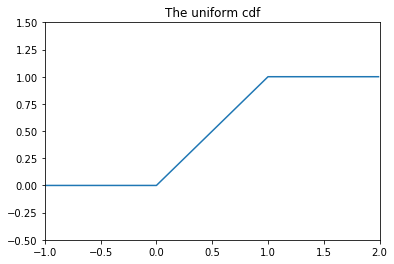

In [13]:
xs = [x_i / 100 for x_i in range(-100, 200)]
ys = [uniform_cdf(x_i) for x_i in xs]
plt.plot(xs, ys)
plt.title("The uniform cdf")
plt.axis([-1, 2, -0.5, 1.5])
plt.show

In [14]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

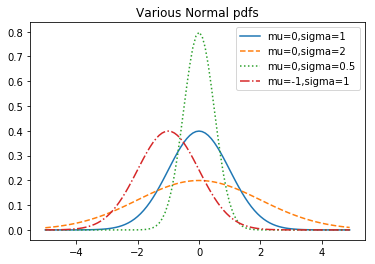

In [15]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x) for x in xs], linestyle='-', label='mu=0,sigma=1')
plt.plot(xs, [normal_pdf(x,sigma=2) for x in xs], linestyle='--', label='mu=0,sigma=2')
plt.plot(xs, [normal_pdf(x,sigma=0.5) for x in xs], linestyle=':', label='mu=0,sigma=0.5')
plt.plot(xs, [normal_pdf(x,mu=-1) for x in xs], linestyle='-.', label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

In [16]:
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

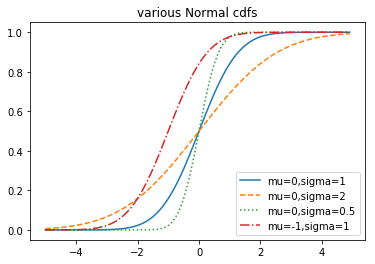

In [17]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs], linestyle='-', label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs], linestyle='--', label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs], linestyle=':', label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs], linestyle='-.', label='mu=-1,sigma=1')
plt.legend(loc=4)
plt.title("various Normal cdfs")
plt.show()



In [18]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""
    
    # if not standard, compute standard and rescale
    if mu != 0 and sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z = -10.0
    high_z = 10.0
    while high_z - low_z > tolerance:
        mid_z = (low_z + high_z) / 2 # consider the midpoint
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z = mid_z
        elif mid_p > p:
            high_z = mid_z
        else:
            break
    return mid_z        

## Central Limit Theorem

In [19]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

In [20]:
def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

In [21]:
def make_hist(p, n, num_points):
    
    data = [binomial(n, p) for _ in range(num_points)]
    
    # use a bar chart to show the acutal binomial samples
    histogram = Counter(data)
    plt.bar([x for x in histogram.keys()], 
            [v / num_points for v in histogram.values()], 
            0.8, color='0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1-p))
    
    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_pdf(i, mu, sigma) for i in xs]
    plt.plot(xs, ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show

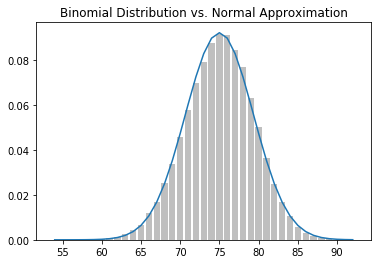

In [22]:
make_hist(0.75, 100, 100000)